PART 2 - DATA EXPLORATION

In [112]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# unesco data set wout predictions
df_unesco = pd.read_csv("unesco.csv")
df_unesco = df_unesco[(df_unesco["Year"] != 2018) &
                      (df_unesco["Year"] != 2019)]
df_unesco.set_index(["Country", "Year"], inplace=True)

# training data used to create predictions
df_unesco_train = pd.read_csv("unesco_train.csv")
df_unesco_train.set_index(["Country", "Year"], drop=False, inplace=True)
df_unesco_train = df_unesco_train[df_unesco_train["pop14under"] > 0]
df_unesco_train = df_unesco_train.dropna()

# unesco data set w predictions
df_unesco_w_preds = pd.read_csv("unesco_with_predictions.csv")
df_unesco_w_preds = df_unesco_w_preds[(df_unesco_w_preds["Year"] != 2018) &
                                      (df_unesco_w_preds["Year"] != 2019)]
df_unesco_w_preds.set_index(["Country", "Year"], inplace=True)

First, I explored the most happy and least happy countries for years 2015-2017 and wanted to see if these countries would match my intuition.

In [113]:
df_2015 = df_unesco_train[df_unesco_train["Year"] == 2015]
df_2016 = df_unesco_train[df_unesco_train["Year"] == 2016]
df_2017 = df_unesco_train[df_unesco_train["Year"] == 2017]

df_yr_dict = {2015: df_2015, 2016: df_2016, 2017: df_2017}
for k, v in df_yr_dict.items():
    print("\nThree 'Most Happy' Countries (%d)" % k)
    display(v["happinessScore"].sort_values(ascending=False)[:3])
    print("\nThree 'Least Happy' Countries (%d)" % k)
    display(v["happinessScore"].sort_values(ascending=True)[:3])

df_unesco_train.set_index(["Country", "Year"], inplace=True)


Three 'Most Happy' Countries (2015)


Country      Year
Switzerland  2015    7.587
Iceland      2015    7.561
Denmark      2015    7.527
Name: happinessScore, dtype: float64


Three 'Least Happy' Countries (2015)


Country  Year
Togo     2015    2.839
Burundi  2015    2.905
Syria    2015    3.006
Name: happinessScore, dtype: float64


Three 'Most Happy' Countries (2016)


Country      Year
Denmark      2016    7.526
Switzerland  2016    7.509
Iceland      2016    7.501
Name: happinessScore, dtype: float64


Three 'Least Happy' Countries (2016)


Country  Year
Burundi  2016    2.905
Syria    2016    3.069
Togo     2016    3.303
Name: happinessScore, dtype: float64


Three 'Most Happy' Countries (2017)


Country  Year
Norway   2017    7.537
Denmark  2017    7.522
Iceland  2017    7.504
Name: happinessScore, dtype: float64


Three 'Least Happy' Countries (2017)


Country                   Year
Central African Republic  2017    2.693
Burundi                   2017    2.905
Tanzania                  2017    3.349
Name: happinessScore, dtype: float64

The results above match my intuition.  
- Switzerland is recorded as one of the top 3 happiest countries in 2015 and 2016 and this makes sense considering Switzerland is known for their excellent health care, family planning, and low death rates.
- Syria, on the other hand, is recorded as one of the bottom 3 hhappiest countries in 2015 and 2016.  This makes sense considering Syria was (and still is) unergoing a civil war. 

Now, I will train this data, using the happinessScore as the labels, to fit machine learning regression models.  I will use the models I have fit to predict on the larger unesco data set (years 1970-2019).  The rest of my exploration will inlove this larger dataset and my corresponding predictions for it.

In [114]:
# plots country happiness
def plot_country_happiness(country, legend_flag=False):
    df_country = df_unesco_w_preds.loc[country]
    hapScores = df_country["happinessScore"].sort_index()
    display(hapScores.plot.line(legend=legend_flag, label=country))

rf = RandomForestRegressor(n_estimators=100, max_features="sqrt")
ytrain = df_unesco_train["happinessScore"]

# only use features with limited missing values
def get_usable_features(country):
    usable_features = []
    df_country = df_unesco.loc[country]
    for col in df_country:
        missing_values = len(df_country[df_country[col] <= 0])
        if missing_values < 5:
            usable_features.append(col)
    return usable_features

# plots country happiness taking missing values into account
def plot_country_happiness2(country):
    usable_features = get_usable_features(country)
    Xtrain = df_unesco_train[usable_features]

    Xtest = df_unesco.loc[country][usable_features]
    rf.fit(Xtrain, ytrain)
    ypreds = rf.predict(Xtest)
    country_preds = pd.DataFrame({"Year": Xtest.index, "happinessScore": ypreds})
    display(country_preds.set_index("Year").plot.line(legend=False))

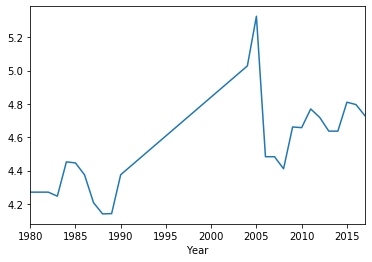

In [115]:
plot_country_happiness("Iraq")

The graph above is a visual of Iraq's "happiness" over time.  As we can see, Iraq's "happiness" undergoes a significant dip somewhere around 2003 to 2005, which is right when the Iraq war begins.  This matches my intuition.  It makes sense that a country's happiness would decrease during times of distress.

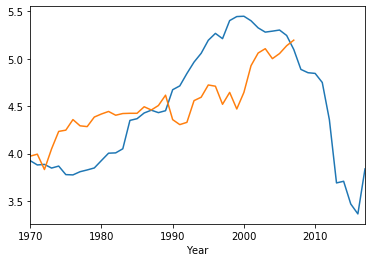

In [116]:
plot_country_happiness2("Syria")
plot_country_happiness("Syria")

Some years had missing values, some years did not.  The blue line indicates predictions made taking missing values into account.  The orange line indicates predictions made using when no missing values are present.

Syria has been in a civil war over the last eight years, with different groups trying to seize control of the country.  This is reflected on the graph above as we can see a drastic decrease in happiness starting around 2010.

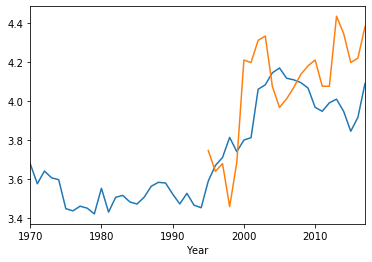

In [117]:
plot_country_happiness2("Cambodia")
plot_country_happiness("Cambodia")

This graph demonstrates a slight dip around 1975, when Khmer Rouge overthrows the previous leader and begins what is now know as Cambodia's "auto-genecide"  This, however, are not very indicative of these drastic events.  I think this is due to the fact that, in order to handle for the missing values, I had to remove some features that were the most indicative of "happiness".

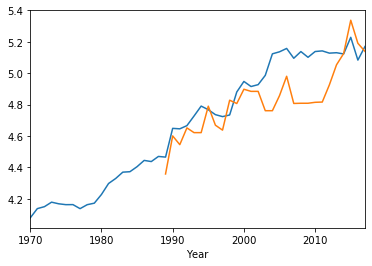

In [118]:
plot_country_happiness2("Vietnam")
plot_country_happiness("Vietnam")

This graph demonstrates lower happiness during the Vietnam War (1955-1975).  The happiness starts to increase as soon as the effects of the war are over.  The increase could also simply be attributed to increase in economic wealth caused by the digital revolution.

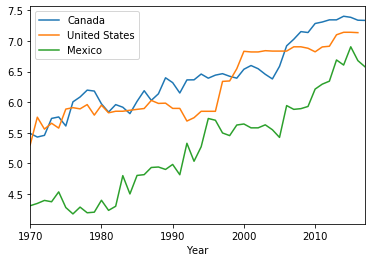

In [119]:
legend_flag = True
plot_country_happiness("Canada", legend_flag)
plot_country_happiness("United States", legend_flag)
plot_country_happiness("Mexico", legend_flag)

This plot comapares country happiness in North America.  It makes sense that countries that are more developed (U.S and Canada) are "happier" than those less developed (Mexico).

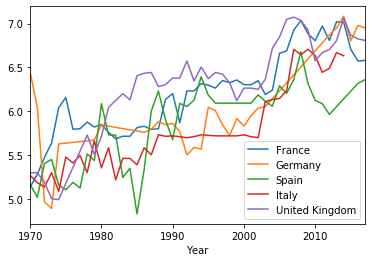

In [120]:
# let's do the same thing for the big 5 of Europe
plot_country_happiness("France", legend_flag)
plot_country_happiness("Germany", legend_flag)
plot_country_happiness("Spain", legend_flag)
plot_country_happiness("Italy", legend_flag)
plot_country_happiness("United Kingdom", legend_flag)

This plot compares the big five countries in Europe.  Nothing jumps out to me about this graph except the fact that the countries all follow the same general upwards trend.

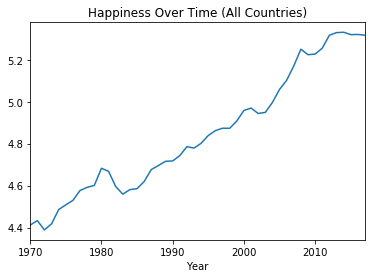

In [121]:
df_unesco_w_preds = pd.read_csv("unesco_with_predictions.csv")
(df_unesco_w_preds.groupby("Year")["happinessScore"]
                 .mean().plot.line(title = "Happiness Over Time (All Countries)"))

This graph demonstrates the mean happiness over time for all countries.  Across all countries, there is a noticable upward trend.  I'm attributing this pattern to the rapid technological growth that started in the late 70's and is seemingly continuing to accelerate.  Since gdp per capita and gni per capita are my most important features (as found in part3), it makes sense that technological growth and thus, economic wealth, would create this trend.

The real question is whether all of this technology is actually increasing our happiness.  That question, however, that is outside of the realm of this project.